# 6.3) Supervised Euclidean
A U-Net is trained here to predict a displacement field and the euclidean distance is taken as error.

# Import statements
Following packages are necessary:

In [1]:
import random
import utils
import os
import imageio
import json
from simplegen import SIMPLESequence

import tensorflow as tf
import numpy as np
import tensorflow.keras.backend as kb
from tensorflow.keras.callbacks import CSVLogger

from unet import UNet
from unet import preprocess_input as pre_une

from matplotlib import pyplot as plt

# Checks
The version of tensorflow as well as the GPU support are checked.

In [2]:
print(tf.__version__)
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.get_visible_devices('GPU')

2.2.0-rc3


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
  # Disable all GPUS
  tf.config.set_visible_devices([], 'GPU')
  visible_devices = tf.config.get_visible_devices()
  for device in visible_devices:
    assert device.device_type != 'GPU'
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

print(tf.config.get_visible_devices('GPU'))
print(tf.config.get_visible_devices('CPU'))

[]
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


# Data
Import training images

In [4]:
store_path = 'experiments/6_3_euclidean'

path_train = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/SIMPLEA/train'
path_validation = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/SIMPLEA/validation'
path_test = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/SIMPLEA/test'

width = 224
height = 224

# Seeding
Seeds are set to ensure reproducible training.

In [5]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Network
A U-Net based network is instantiated with keras to run a semantic segmentation.

In [6]:
model = UNet(filters=32, layers=4, activation='linear', classes=2, input_shape=(224, 224, 1))
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 32) 288         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 224, 224, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 224, 224, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

# Data Preparation
A batch with only one image is used.

# Training Preparation
Prepare the settings for training the model.

In [7]:
image_ids = None

train_gen = SIMPLESequence(path_train,
                           batch_size=4,
                           image_ids=image_ids,
                           preprocess_input=pre_une,
                           shuffle=True)

validation_gen = SIMPLESequence(path_validation,
                                batch_size=4,
                                preprocess_input=pre_une,
                                width=width,
                                height=height)

In [8]:
logger = CSVLogger(store_path + "/log")

callbacks = [logger]

model.compile(optimizer='adam', loss = utils.msed_loss)
#model.fit_generator(train_gen,
#          validation_data=validation_gen,
#          callbacks=callbacks,
#          epochs=100)


model.fit(train_gen,
          epochs=300,
          callbacks=callbacks,
          validation_data=validation_gen,
          validation_freq=1,
          #use_multiprocessing=True,
          workers=10,
          max_queue_size=32)

Epoch 1/300


/home/julian/anaconda3/envs/endolas/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


42/42 [==============================] - 94s 2s/step - loss: 1647.4834 - val_loss: 76013.1562
Epoch 2/300
42/42 [==============================] - 96s 2s/step - loss: 1592.3396 - val_loss: 31418.7461
Epoch 3/300
42/42 [==============================] - 94s 2s/step - loss: 1439.4880 - val_loss: 1776.9485
Epoch 4/300
42/42 [==============================] - 93s 2s/step - loss: 1251.7740 - val_loss: 1852.0380
Epoch 5/300
42/42 [==============================] - 93s 2s/step - loss: 1158.3163 - val_loss: 6923.8613
Epoch 6/300
42/42 [==============================] - 92s 2s/step - loss: 1117.8339 - val_loss: 1265.5198
Epoch 7/300
42/42 [==============================] - 94s 2s/step - loss: 1006.9386 - val_loss: 950.7366
Epoch 8/300
42/42 [==============================] - 93s 2s/step - loss: 984.0272 - val_loss: 969.9189
Epoch 9/300
42/42 [==============================] - 93s 2s/step - loss: 958.3377 - val_loss: 876.8878
Epoch 10/300
42/42 [==============================] - 94s 2s/step - lo

42/42 [==============================] - 92s 2s/step - loss: 24.9627 - val_loss: 71.0056
Epoch 81/300
42/42 [==============================] - 93s 2s/step - loss: 33.7835 - val_loss: 67.9118
Epoch 82/300
42/42 [==============================] - 93s 2s/step - loss: 27.1884 - val_loss: 67.7256
Epoch 83/300
42/42 [==============================] - 92s 2s/step - loss: 25.4797 - val_loss: 85.7473
Epoch 84/300
42/42 [==============================] - 93s 2s/step - loss: 31.6529 - val_loss: 81.2704
Epoch 85/300
42/42 [==============================] - 92s 2s/step - loss: 27.8994 - val_loss: 68.0241
Epoch 86/300
42/42 [==============================] - 93s 2s/step - loss: 31.3915 - val_loss: 73.8643
Epoch 87/300
42/42 [==============================] - 92s 2s/step - loss: 24.0720 - val_loss: 61.6139
Epoch 88/300
42/42 [==============================] - 92s 2s/step - loss: 28.9994 - val_loss: 65.8815
Epoch 89/300
42/42 [==============================] - 92s 2s/step - loss: 40.1114 - val_loss: 1

Epoch 160/300
42/42 [==============================] - 92s 2s/step - loss: 12.3819 - val_loss: 56.0758
Epoch 161/300
42/42 [==============================] - 93s 2s/step - loss: 8.6034 - val_loss: 55.6001
Epoch 162/300
42/42 [==============================] - 93s 2s/step - loss: 7.4882 - val_loss: 54.7066
Epoch 163/300
42/42 [==============================] - 93s 2s/step - loss: 8.6375 - val_loss: 48.6266
Epoch 164/300
42/42 [==============================] - 92s 2s/step - loss: 8.3696 - val_loss: 54.7379
Epoch 165/300
42/42 [==============================] - 92s 2s/step - loss: 6.0901 - val_loss: 51.6694
Epoch 166/300
42/42 [==============================] - 93s 2s/step - loss: 6.4561 - val_loss: 52.7668
Epoch 167/300
42/42 [==============================] - 92s 2s/step - loss: 5.1767 - val_loss: 50.8533
Epoch 168/300
42/42 [==============================] - 92s 2s/step - loss: 5.4358 - val_loss: 50.5342
Epoch 169/300
42/42 [==============================] - 92s 2s/step - loss: 7.8576

42/42 [==============================] - 92s 2s/step - loss: 4.9528 - val_loss: 48.0733
Epoch 241/300
42/42 [==============================] - 92s 2s/step - loss: 5.7786 - val_loss: 56.6047
Epoch 242/300
42/42 [==============================] - 92s 2s/step - loss: 6.7816 - val_loss: 52.3789
Epoch 243/300
42/42 [==============================] - 92s 2s/step - loss: 8.7328 - val_loss: 50.0263
Epoch 244/300
42/42 [==============================] - 92s 2s/step - loss: 7.1497 - val_loss: 50.2398
Epoch 245/300
42/42 [==============================] - 93s 2s/step - loss: 5.2702 - val_loss: 50.7327
Epoch 246/300
42/42 [==============================] - 92s 2s/step - loss: 3.4392 - val_loss: 48.3459
Epoch 247/300
42/42 [==============================] - 92s 2s/step - loss: 6.0337 - val_loss: 52.1342
Epoch 248/300
42/42 [==============================] - 92s 2s/step - loss: 8.0339 - val_loss: 50.1806
Epoch 249/300
42/42 [==============================] - 93s 2s/step - loss: 6.6637 - val_loss: 48

In [9]:
model.save_weights(store_path + "/weights.hdf5")

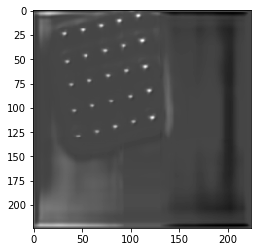

In [19]:
X, y = validation_gen[1]

y_pred = model.predict(X)

u_x = y_pred[0,:,:,0]
u_y = y_pred[0,:,:,1]

plt.imshow(y_pred[0,:,:,0], cmap="gray")

plt.imsave(store_path + "/u_x.png", u_x, cmap="gray")
plt.imsave(store_path + "/u_y.png", u_y, cmap="gray")

u_x.dump(store_path + "/u_x")
u_y.dump(store_path + "/u_y")

In [20]:
def plot_cube(img, x, y, val):
    
    img[y][x] = val
    img[y][x-1] = val
    img[y][x+1] = val
    img[y-1][x] = val
    img[y-1][x-1] = val
    img[y-1][x+1] = val
    img[y+1][x] = val
    img[y+1][x-1] = val
    img[y+1][x+1] = val  

In [21]:
y[0,0,0,0]

46.0

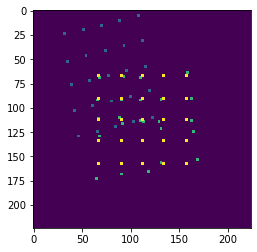

In [22]:
warp = np.zeros((width, height))

for index in range(0,25):
    x_pos = int(y[0, index, 0, 0])
    y_pos = int(y[0, index, 1, 0])
    
    plot_cube(warp, x_pos, y_pos, 1) #blue
    
    ux_field = y_pred[0,:,:,0]
    uy_field = y_pred[0,:,:,1]
    
    ux = ux_field[y_pos][x_pos]
    uy = uy_field[y_pos][x_pos]
    
    x_pos = int(round(x_pos + ux))
    y_pos = int(round(y_pos + uy))
            
    plot_cube(warp, x_pos, y_pos, 2) #green    
    
    x_pos = int(y[0, index, 0, 1])
    y_pos = int(y[0, index, 1, 1])
    
    plot_cube(warp, x_pos, y_pos, 3) #yellow    
    
plt.imshow(warp)
plt.imsave(store_path + "/warp.png", warp)